# Exploring Biodiversity in National Parks

In this analysis, we will look at observation data from a seven day period at four national parks; Yellowstone National Park, Yosemite National Park, Bryce National Park and Great Smoky Mountains National Park.  We will look into what species are observed in these parks, and at what frequency, to determine which parks may have the most diversity.

### Description of the Data

The data involved in this project comes from two separate files: species_info.cvs and observations.csv. The species_info dataset contains information on different species, such as their scientific class (cataloged under category), scientific name, common names and their conservation status.  The observations dataset contains information on the number of sightings of species (cataloged under their scientific name) at four different national parks in the last seven days. 

### Questions to be Answered
Which parks have the most biodiversity? 

How does class of species effect number of observations?

How often are at risk species seen compared to lower risk? 

Which have the most at-risk species? 

### Outline of Notebook

To organize the notebook, I will give a rough outline of the headings included.

- Cleaning the Data
- Organizing the Data
- Exploring the Data : This area will be separated by question.
- Conclusion

## Cleaning the Data

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Let's take a look at the data that we are working with.

In [36]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [21]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [22]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


First the observations data will be cleaned up.

In [113]:
print(observations.nunique())
print('Actual Number of Entries:', len(observations))
print('Expected Number of Entries:', 5541 * 4)

scientific_name    5541
park_name             4
observations        304
dtype: int64
Actual Number of Entries: 23296
Expected Number of Entries: 22164


We can see that there are non-unique entries in observations that are not lost when dropping the duplicates.  Some scientific names must appear more than once for the same park, meaning the data may not be consolidated into one observation entry.

In [24]:
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park_name', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


Now all the observations have been counted under one entry, which we know because all the unique scientific names times the number of parks equals the expected number of entries now, where it did not before.

Now the species info data will be cleaned up.

In [37]:
print(species_info.nunique())
print(len(species_info))

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64
5824


Here we can see that there are more entries into species_info than there are unique scientific names, meaning there are likely duplicates in the data. 

In [32]:
species_info.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

In [35]:
print(species_info.nunique())
len(species_info)

category                  7
scientific_name        5541
common_names           5231
conservation_status       4
dtype: int64


5541

Now we can see that there are the same number of unique scientific names as entries in species_info.

## Organizing the Data

Now we need to organize the data into something we can learn from.

In [43]:
df = pd.merge(observations, species_info, left_on = 'scientific_name', right_on = 'scientific_name', how = 'left')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


Now we will check that everything appears to have gone okay in the merge.

In [44]:
df.park_name.value_counts()

Great Smoky Mountains National Park    6408
Bryce National Park                    6408
Yellowstone National Park              6408
Yosemite National Park                 6408
Name: park_name, dtype: int64

This is more entries than we expect based on what our data looked like after cleaning, so we will drop any remaining duplicates.

In [45]:
df.drop_duplicates(subset=['scientific_name', 'park_name'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   common_names         22164 non-null  object
 5   conservation_status  712 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [46]:
df.park_name.value_counts()

Great Smoky Mountains National Park    5541
Bryce National Park                    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: park_name, dtype: int64

In [47]:
df.conservation_status.value_counts()

Species of Concern    604
Endangered             60
Threatened             36
In Recovery            12
Name: conservation_status, dtype: int64

Let us assume that if there is a missing entry in the conservation status column, it is because the conservation status is "Least Concern".  While they could also be missing data to classify the species, if they are observed in national parks in the last 7 days, it may be assumed that there is enough data known about them to understand the level of conservation concern.

In [48]:
df.fillna('Least Concern', inplace=True) 

In [49]:
df.conservation_status.value_counts()

Least Concern         21452
Species of Concern      604
Endangered               60
Threatened               36
In Recovery              12
Name: conservation_status, dtype: int64

## Exploring the Data

### Which parks have the most biodiversity?

An important sub-question here is how are we considering biodiversity?  We will look at which parks have the most observations of life, as well as how those are split up by species class.

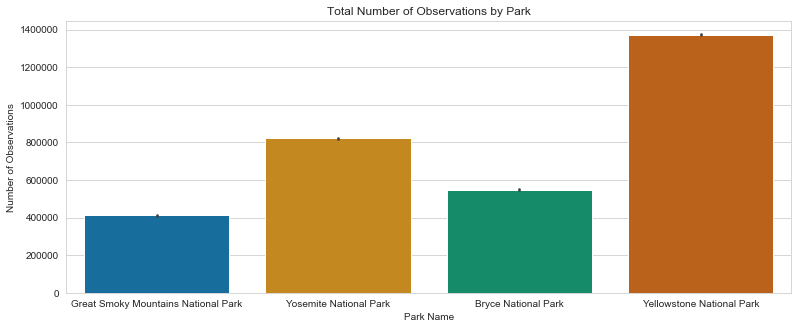

In [72]:
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'park_name', y = 'observations', estimator=sum, palette = 'colorblind')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Park')
plt.show()

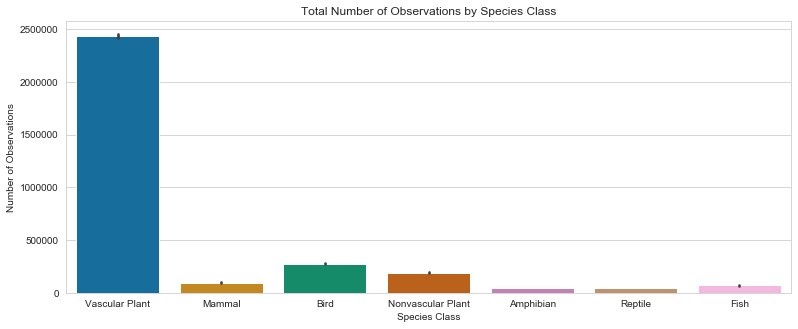

In [70]:
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'category', y = 'observations', estimator = sum, palette = 'colorblind')
plt.xlabel('Species Class')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Species Class')
plt.show()

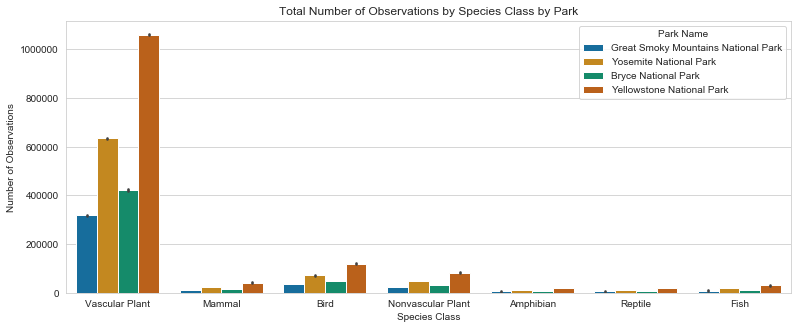

In [73]:
plt.figure(figsize = (13, 5))
sns.barplot(data = df, x = 'category', y = 'observations', estimator = sum, hue = 'park_name', palette = 'colorblind')
sns.set_style('whitegrid')
plt.legend(title = 'Park Name')
plt.xlabel('Species Class')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Species Class by Park')
plt.show()

It is quite hard to see some of the lesser observed species classes when compared to vascular plants.  We will see what it looks like without the vascular plant observations.

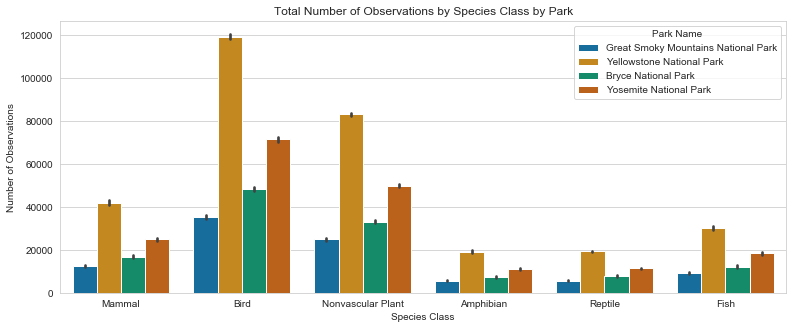

In [74]:
plt.figure(figsize = (13, 5))
sns.barplot(data = df[df.category != 'Vascular Plant'], x = 'category', y = 'observations', estimator = sum, hue = 'park_name', palette = 'colorblind')
sns.set_style('whitegrid')
plt.legend(title = 'Park Name')
plt.xlabel('Species Class')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Species Class by Park')
plt.show()

We can see that Yellowstone has the highest number of total observations and observations by class in all species classes.  This could mean that Yellowstone has the largest biodiversity, but it could also be a result of popularity of national park.  It could be that this data was taken during a high level of visitors in Yellowstone.

Yosemite has the second highest total observations, as well as observations by class in all species classes. 

The same trend goes for Bryce and Great Smoky Mountains National parks. For total observations they respectively take third and fourth place, and the same goes for each species class observations.

### How does class of species effect number of observations?

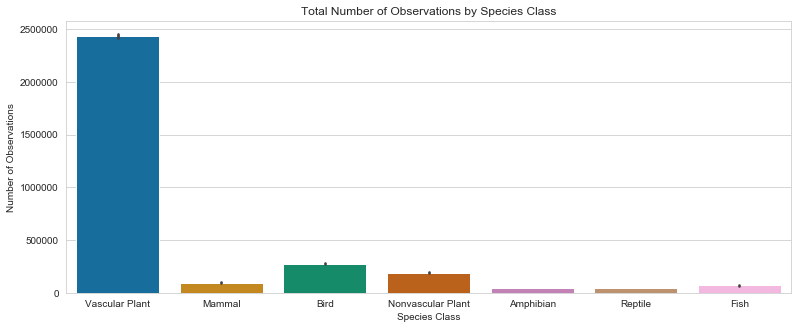

In [107]:
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'category', y = 'observations', estimator=sum, palette = 'colorblind')
plt.xlabel('Species Class')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Species Class')
plt.show()

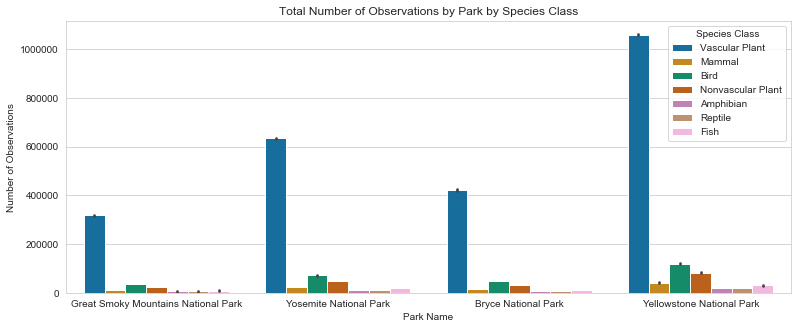

In [110]:
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'park_name', y = 'observations', hue = 'category', estimator=sum, palette = 'colorblind')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Park by Species Class')
plt.legend(title = 'Species Class')
plt.show()

Vascular plants are seen at a much higher rate than any other class of species.  This makes sense, as plant life is easily seen at all times in any given location where there is plant life.  It is harder to observe animals, who are able to move around and hide themselves, and fish, who live under water.

### How often are at-risk species seen versus low risk species?

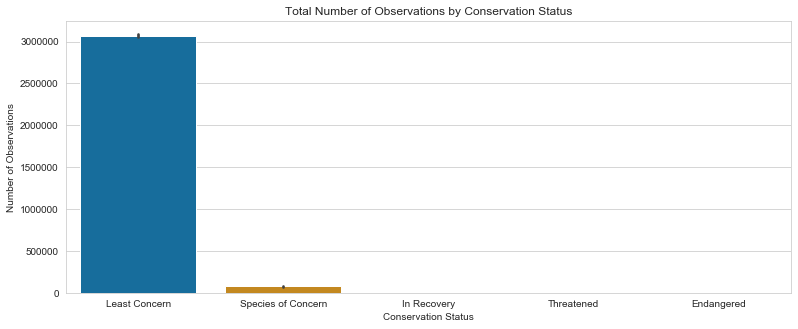

In [88]:
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'conservation_status', y = 'observations', estimator=sum, palette = 'colorblind', order = order)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Conservation Status')
plt.show()

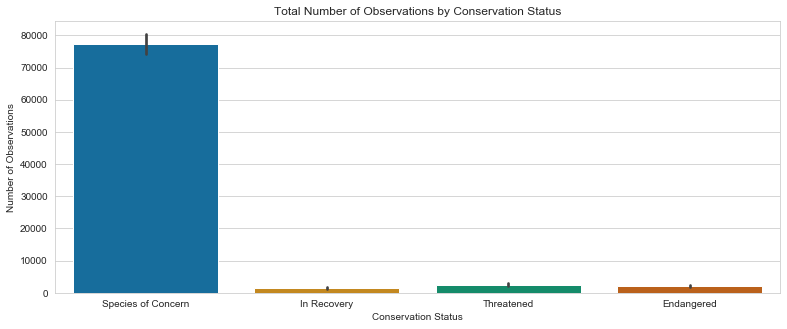

In [91]:
new_order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df[df.conservation_status != 'Least Concern'], x = 'conservation_status', y = 'observations', estimator=sum, palette = 'colorblind', order = new_order)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Conservation Status')
plt.show()

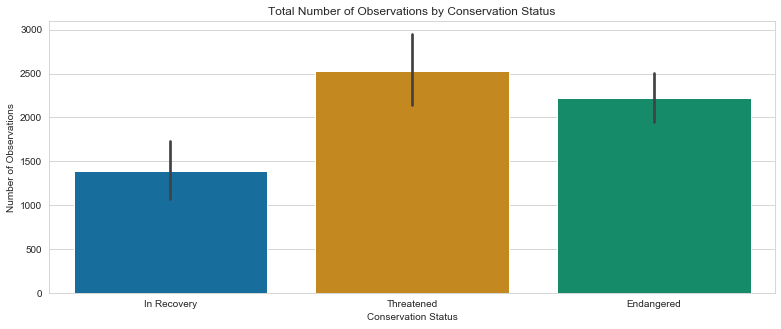

In [94]:
new_order2 = ['In Recovery', 'Threatened', 'Endangered']
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df[df.conservation_status != ('Least Concern', 'Species of Concern')], x = 'conservation_status', y = 'observations', estimator=sum, palette = 'colorblind', order = new_order2)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Conservation Status')
plt.show()

In [100]:
total = df.observations.sum()
least_concern = df.observations[df.conservation_status == 'Least Concern'].sum()
species_of_concern = df.observations[df.conservation_status == 'Species of Concern'].sum()
in_recovery = df.observations[df.conservation_status == 'In Recovery'].sum()
threatened = df.observations[df.conservation_status == 'Threatened'].sum()
endangered = df.observations[df.conservation_status == 'Endangered'].sum()
print(total, least_concern, species_of_concern, in_recovery, threatened, endangered)

3154266 3070666 77462 1392 2526 2220


In [101]:
perc_least_concerned = (least_concern / total) * 100
perc_species_of_concerned = (species_of_concern / total) * 100
perc_in_recovery = (in_recovery / total) * 100
perc_threatened = (threatened / total) * 100
perc_endangered = (endangered / total) * 100

In [104]:
print('Percent Least Concern: ', perc_least_concerned.round(2))
print('Percent Species of Concern: ', perc_species_of_concerned.round(2))
print('Percent In Recovery: ', perc_in_recovery.round(2))
print('Percent Threatened: ', perc_threatened.round(2))
print('Percent Endangered: ', perc_endangered.round(2))

Percent Least Concern:  97.35
Percent Species of Concern:  2.46
Percent In Recovery:  0.04
Percent Threatened:  0.08
Percent Endangered:  0.07


From the previous graphs and calculations, we can see that species classified as Least Concern are seen at a much higher rate than other conservation statuses.  97.35% of observations were species of least concern, 2.46% of observations were species of concern, and species that were in recovery, threatened or endangered made up less than 0.2% of observations.

### Which parks have the most at risk species?

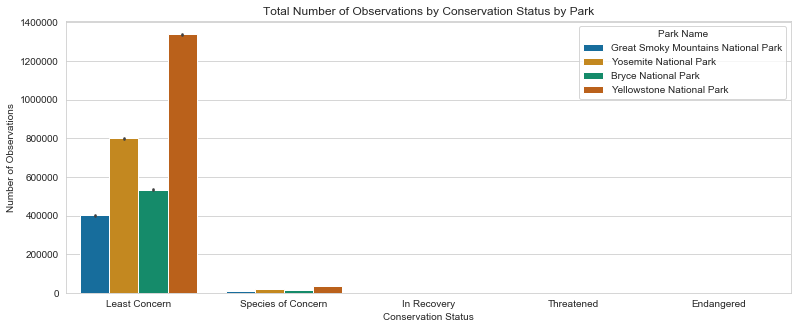

In [81]:
order = ['Least Concern', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'conservation_status', y = 'observations',hue = 'park_name', estimator=sum, palette = 'colorblind', order = order)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Conservation Status by Park')
plt.legend(title = 'Park Name')
plt.show()

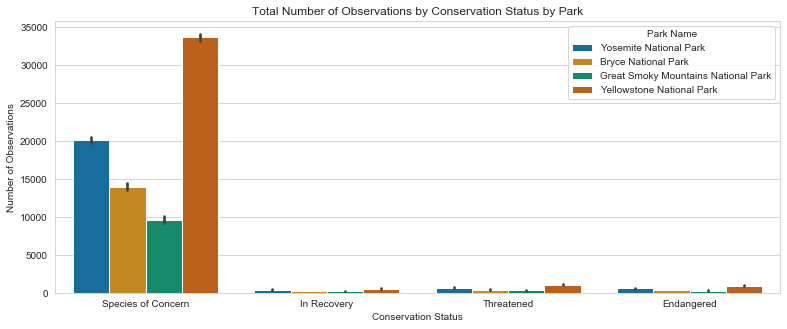

In [89]:
new_order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df[df.conservation_status != 'Least Concern'], x = 'conservation_status', y = 'observations', hue = 'park_name', estimator=sum, palette = 'colorblind', order = new_order)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Conservation Status by Park')
plt.legend(title = 'Park Name')
plt.show()

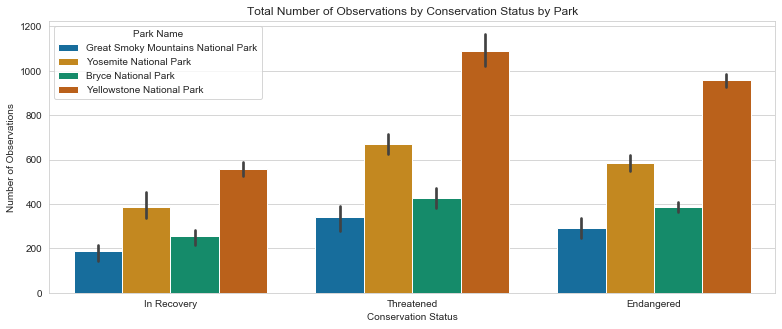

In [92]:
new_order2 = ['In Recovery', 'Threatened', 'Endangered']
plt.figure(figsize = (13, 5))
sns.set_style('whitegrid')
sns.barplot(data = df[df.conservation_status != ('Least Concern', 'Species of Concern')], x = 'conservation_status', y = 'observations', hue = 'park_name', estimator=sum, palette = 'colorblind', order = new_order2)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.title('Total Number of Observations by Conservation Status by Park')
plt.legend(title = 'Park Name')
plt.show()

It was quite difficult to see all the conservation status bars when considering all statuses together, so there are three graphs including different statuses for ease of viewing.

We see that the numbers are lowest for species in recovery.  This could be because it is difficult to bring a species to a recovery state.

We can see that the same trend is followed regardless of conservation status.  Yellowstone has the most observations, Yosemite the second, Bryce the third and then Great Smoky Mountains in fourth. So it is safe to say that Yellowstone has the most observations of at risk species.

## Conclusion

We can see that there is a similar pattern throughout the data.  Yellowstone has the most observations total, by species class, and by conservation status, followed in second by Yosemite, then third by Bryce and lastly the Great Smokey Mountains. While this could be because Yellowstone truly has the greatest biodiversity by our measures, it could also be how popular the park is.  Yellowstone is a well visited and well staffed park, where there could be many more individuals to observe animals than less popular parks. Regardless, our data shows that Yellowstone has the most diversity by our metrics.